# Using the RBF Kernel to Improve Classification


##Step 1: Introduction to RBF Kernel

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Set random seed for reproducibility
np.random.seed(42)

## Step 2: Dataset Preparation and Visualization

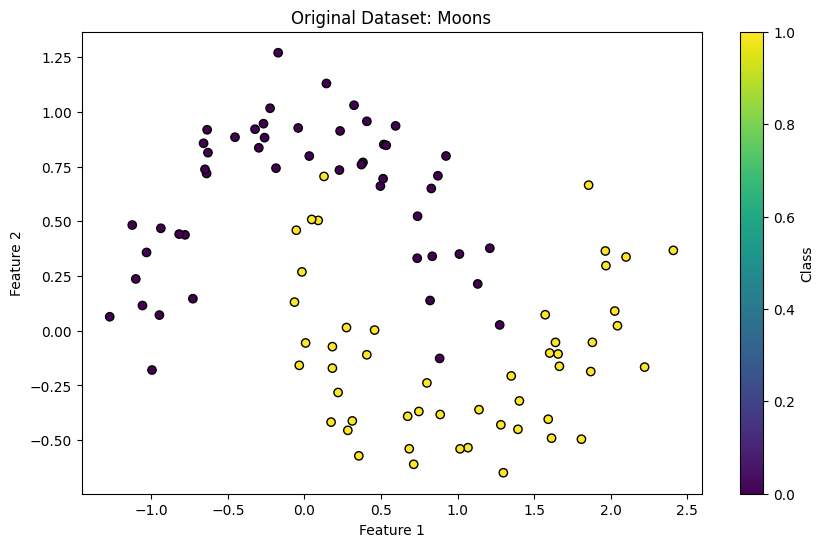

In [ ]:
# Generate a non-linearly separable dataset (two moons)
X, y = make_moons(noise=0.15, random_state=42)

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Original Dataset: Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

## Step 3: Implementing RBF Kernel in Scikit-learn

In [ ]:
# Create an SVM classifier with RBF kernel
# We use a pipeline to first standardize the data (important for SVM performance)
# Then apply the SVM with RBF kernel
rbf_svm = make_pipeline(StandardScaler(),
                        SVC(kernel='rbf', gamma='scale'))

# Train the model on our dataset
rbf_svm.fit(X, y)
print("Model trained successfully!")

Model trained successfully!


##Step 4: Visualizing Decision Boundaries

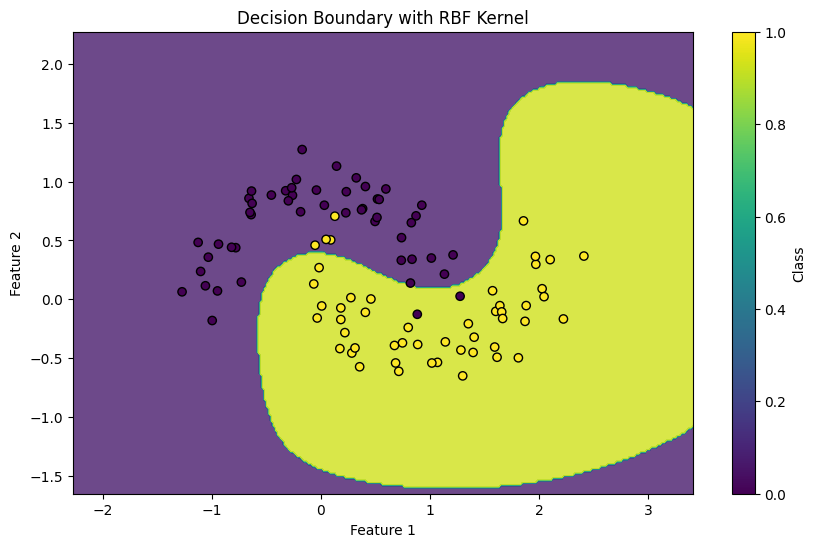

In [ ]:
def plot_decision_boundary(model, X, y):
    """
    Function to plot the decision boundary of a classifier

    Parameters:
    model: The trained classifier
    X: Feature matrix
    y: Target vector
    """
    # Set the step size for the mesh grid
    h = .02

    # Create mesh grid boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')
    plt.title("Decision Boundary with RBF Kernel")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Class')
    plt.show()

# Let's visualize how our RBF kernel SVM separates the data
plot_decision_boundary(rbf_svm, X, y)

##Step 5: Evaluating Model Performance

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

# Train the model on training data
rbf_svm.fit(X_train, y_train)

# Make predictions on test data
y_pred = rbf_svm.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"RBF Kernel SVM Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

RBF Kernel SVM Accuracy: 0.9600

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.86      1.00      0.92         6

    accuracy                           0.96        25
   macro avg       0.93      0.97      0.95        25
weighted avg       0.97      0.96      0.96        25



##Bonus: Comparison with Linear Kernel


Linear Kernel SVM Performance:
Linear Kernel SVM Accuracy: 0.8800


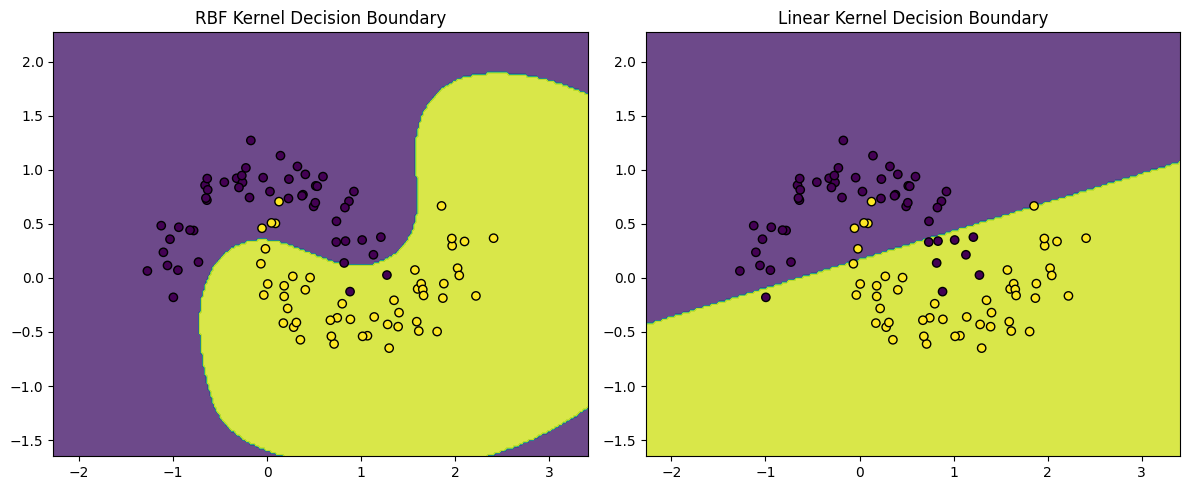

In [ ]:
# For comparison, let's also try a linear kernel to see the difference
linear_svm = make_pipeline(StandardScaler(),
                          SVC(kernel='linear'))
linear_svm.fit(X_train, y_train)
y_linear_pred = linear_svm.predict(X_test)

print("\nLinear Kernel SVM Performance:")
print(f"Linear Kernel SVM Accuracy: {accuracy_score(y_test, y_linear_pred):.4f}")

# Visualize both decision boundaries for comparison
plt.figure(figsize=(12, 5))

# First subplot for RBF kernel
plt.subplot(1, 2, 1)
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')
plt.title("RBF Kernel Decision Boundary")

# Second subplot for linear kernel
plt.subplot(1, 2, 2)
Z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')
plt.title("Linear Kernel Decision Boundary")

plt.tight_layout()
plt.show()